## Setting up data

Loading library

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns

Loading & cleaning dataset

In [101]:
def bcd_load_clean():
    bcd = pd.read_csv('./data/breast_cancer_data.csv')
    bcd['patient_id'] = bcd['patient_id'].astype('string')
    bcd['doctor_name'] = bcd['doctor_name'].str.split().str[1]
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])
    
    return bcd

bcd = bcd_load_clean()

bcd = bcd.drop(labels = ['patient_id', 'cell_size_uniformity', 'cell_shape_uniformity', 
                          'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
                          'bare_nuclei', 'normal_nucleoli', 'mitoses'],
                axis = 1,
                inplace = False)

In [102]:
bcd

,clump_thickness,bland_chromatin,class,doctor_name
0,5.0,3.0,benign,Doe
1,5.0,3.0,benign,Smith
2,3.0,3.0,benign,Lee
3,6.0,3.0,benign,Smith
4,4.0,3.0,benign,Wong
...,...,...,...,...
694,3.0,1.0,benign,Lee
695,2.0,1.0,benign,Smith
696,5.0,8.0,malignant,Lee
697,4.0,10.0,malignant,Lee


## Data Analysis

### Comparing bland chromatin measurements between different doctors

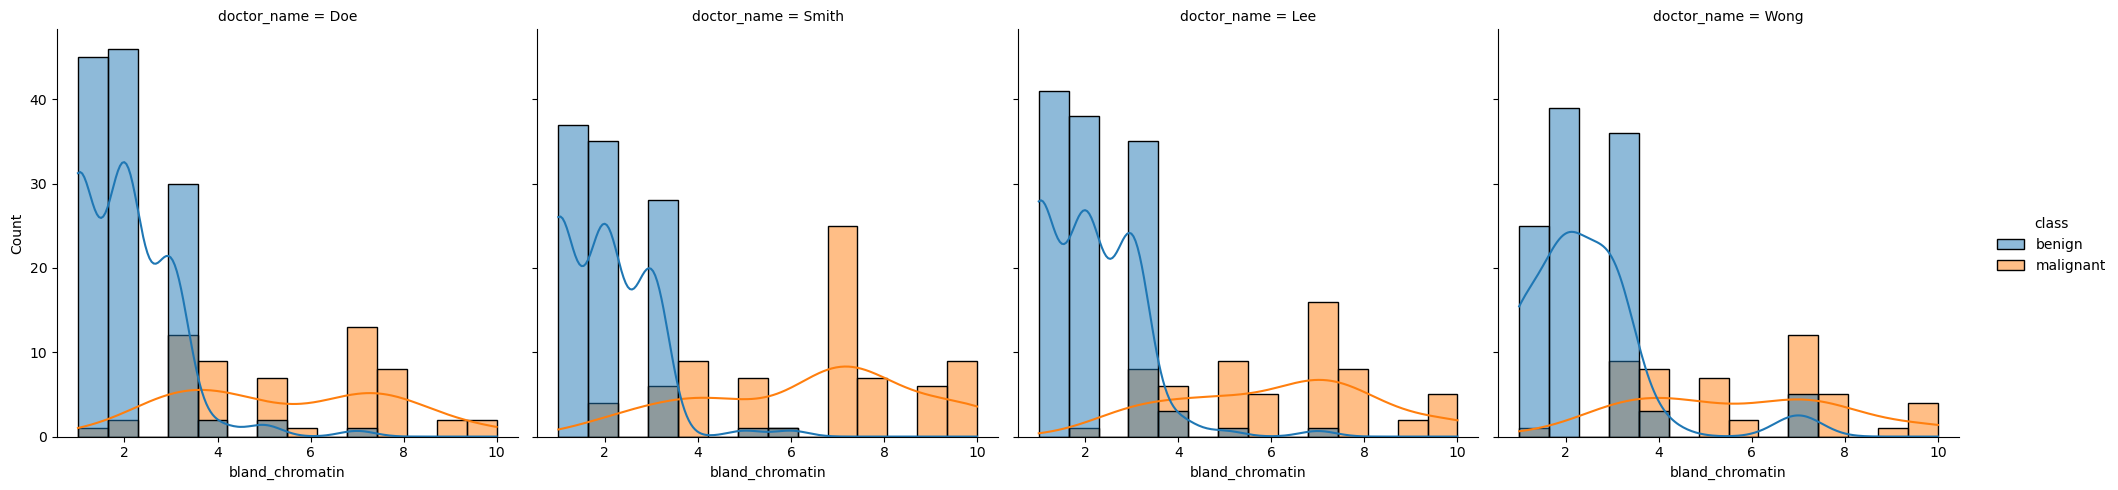

In [103]:
sns.displot(data = bcd, hue='class', x='bland_chromatin', col = 'doctor_name', kde = True)

### Comparing clump thickness measurements between different doctors

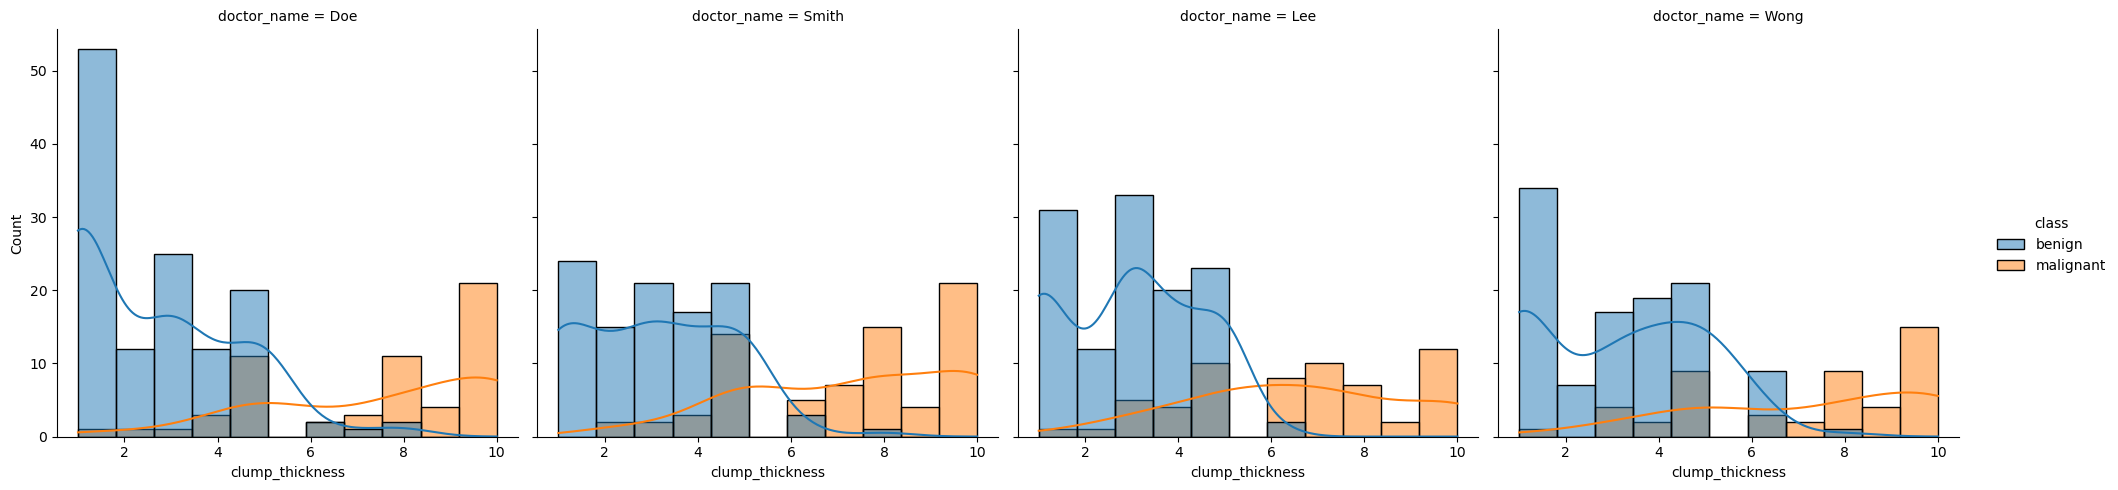

In [104]:
sns.displot(data = bcd, hue='class', x='clump_thickness', col = 'doctor_name', kde = True)

### Comparing doctors' assessments of whether tumors are benign or malignant based on their bland chromatin

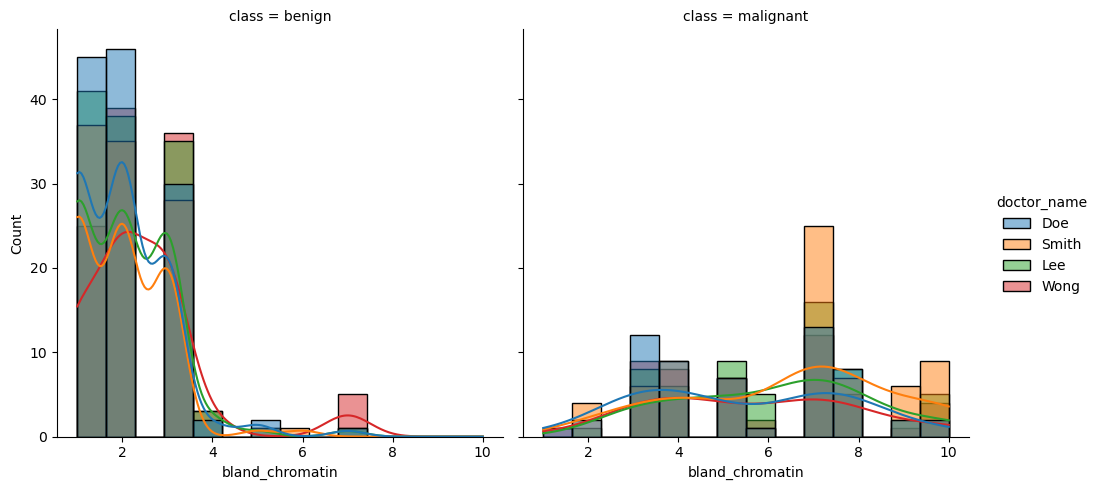

In [105]:
sns.displot(data = bcd, hue='doctor_name', x='bland_chromatin', col = 'class', kde = True)

### Comparing doctors'assessments of whether tumors are benign or malignant based on their clump thickness

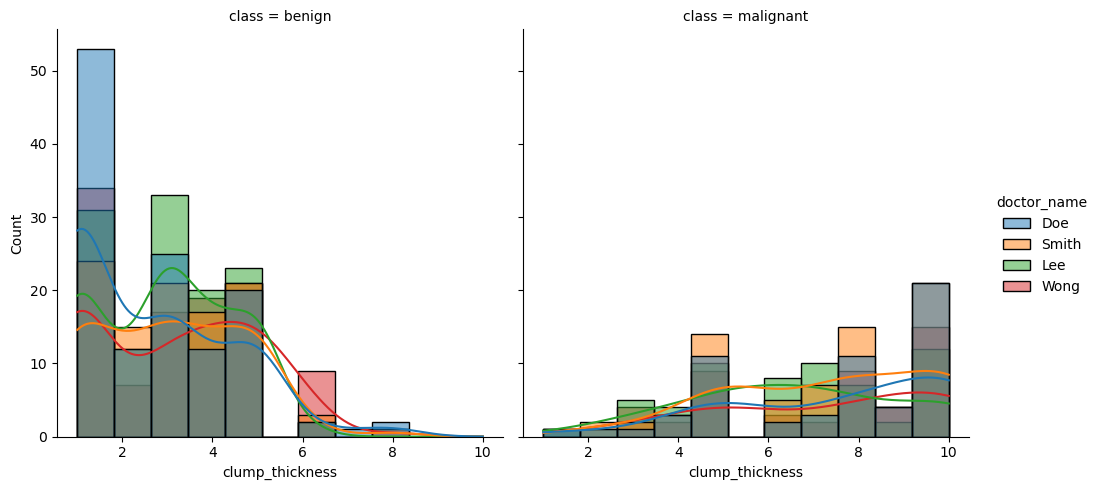

In [106]:
sns.displot(data = bcd, hue='doctor_name', x='clump_thickness', col = 'class', kde = True)

### Comparison of diagnoses of benign tumors by each doctor

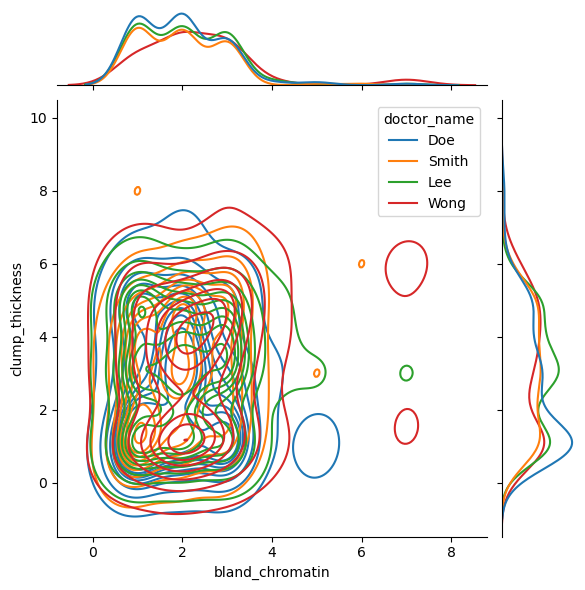

In [107]:
sns.jointplot(data=bcd[bcd['class'] == 'benign'], x="bland_chromatin", y="clump_thickness", hue="doctor_name", kind ="kde")

### Comparison of diagnoses of malignant tumors by each doctor

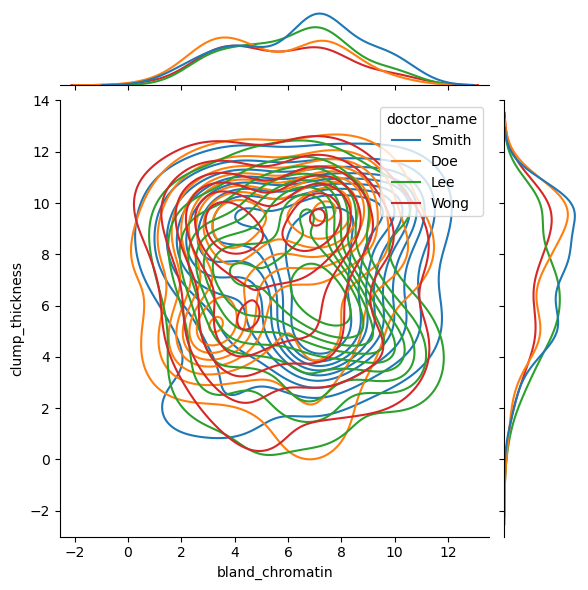

In [108]:
sns.jointplot(data=bcd[bcd['class'] == 'malignant'], x="bland_chromatin", y="clump_thickness", hue="doctor_name", kind ="kde")

## Conclusion


Similar patterns are present when comparing the doctors' assessments of whether a tumor is belign or malignant when looking at the clump thickness and bland chromatin. All 4 doctors appear to be making similar diagnoses with respect to the data they are presented.